In [1]:
from utils import import_labelled_data
import pandas as pd

data = import_labelled_data(group_relevant=False).iloc[:5000] # top level keys are classes, each class has a list of articles

from sklearn.model_selection import train_test_split

trainData, testData = train_test_split(data[['text','class']], test_size=0.2, random_state=42)

FileNotFoundError: File data/labelled/data.json does not exist

In [3]:
trainData.head()

,text,class
4227,This study is summarised as evidence for the f...,Subtidal Benthic Invertebrate Conservation
4676,This study is summarised as evidence for the f...,Terrestrial Mammal Conservation
800,A study in 2002–2003 in a coastal sand dune in...,Butterfly and Moth Conservation
3671,A before-and-after site comparison study in 19...,Primate Conservation
4193,"A replicated, controlled study in 1999 in one ...",Subtidal Benthic Invertebrate Conservation


In [4]:
from SimpleModels.RandomClassifier import RandomClassifier
random = RandomClassifier()
random.train(trainData)

In [5]:
from SimpleModels.LogisticRegressionClassifier import LogisticRegressionClassifier

# roughly 25s per 4000 articles
print('Estimated time to train on full dataset: ', 25 / 4000 * len(trainData), 'seconds')

logistic = LogisticRegressionClassifier()
logistic.train(trainData)

Estimated time to train on full dataset:  25.0 seconds


In [6]:
from SimpleModels.NaiveBayesClassifier import NaiveBayesClassifier
bayes = NaiveBayesClassifier()
bayes.train(trainData)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix

classifiers = [random, logistic, bayes]

# maximise function with high precision
def precise_accuracy(accu, prec):
    return 0.5*accu + 0.5*prec

In [8]:
results = {}

for classifier in classifiers:
    predYLabels = classifier.predict(testData[['text']])
    predYProbabilities = classifier.predict_proba(testData[['text']])

    results[classifier.__class__.__name__] = {
            "accuracy": accuracy_score(testData['class'], predYLabels),
            "f1": f1_score(testData['class'], predYLabels, average='macro',zero_division=0),
            "precision": precision_score(testData['class'], predYLabels, average='macro',zero_division=0),
            "confusion_matrix": confusion_matrix(testData['class'], predYLabels)
        }
    results[classifier.__class__.__name__]['precision-accuracy'] = precise_accuracy(results[classifier.__class__.__name__]["accuracy"], results[classifier.__class__.__name__]["precision"])


def format_output(metrics):
    for classifier, metric in metrics.items():
        for key, value in metric.items():
            # truncate
            if key != "confusion_matrix":
                metric[key] = round(value, 6)
        print(f"Classifier: {classifier} \nAccuracy: {metric['accuracy']} \t F1: {metric['f1']} \t Precision: {metric['precision']} \t Precision-Accuracy: {metric['precision-accuracy']}")
        print("\n\n")

format_output(results)

Classifier: RandomClassifier 
Accuracy: 0.078 	 F1: 0.029966 	 Precision: 0.030229 	 Precision-Accuracy: 0.054115



Classifier: LogisticRegressionClassifier 
Accuracy: 0.881 	 F1: 0.634478 	 Precision: 0.737872 	 Precision-Accuracy: 0.809436



Classifier: NaiveBayesClassifier 
Accuracy: 0.594 	 F1: 0.227149 	 Precision: 0.302194 	 Precision-Accuracy: 0.448097





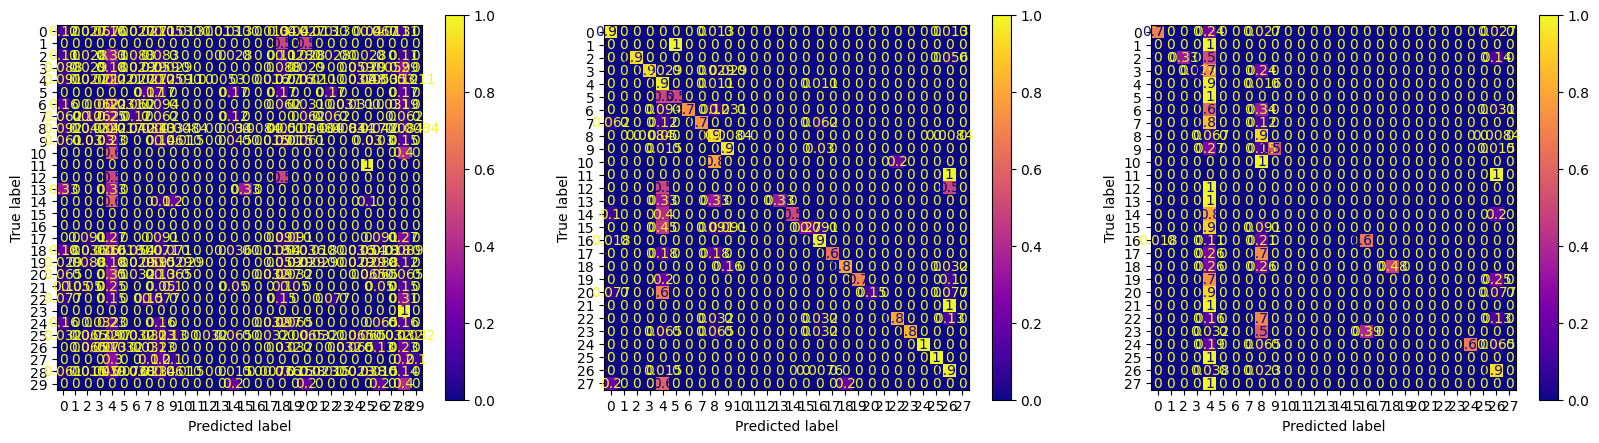

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


# display in len(classifiers) subplot squares

fig, axs = plt.subplots(1, len(classifiers), figsize=(20, 5))

for i, classifier in enumerate(classifiers):
    predYLabels = classifier.predict(testData[['text']])
    confusion = confusion_matrix(testData['class'], predYLabels,normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
    disp.plot(ax=axs[i],cmap='plasma')

plt.show()



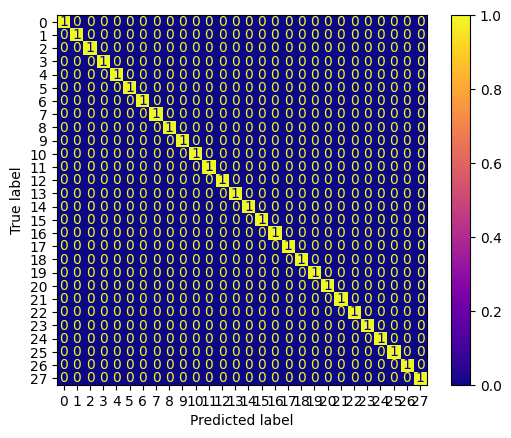

In [32]:
# plot perfect prediction
perfect = [y for y in testData['class']]
confusion = confusion_matrix(testData['class'], perfect,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=confusion)
disp.plot(cmap='plasma')